In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import PIL
import os
import cv2
from tensorflow.keras import layers
from keras.models import Sequential

In [16]:
#dataser_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#data_dir = tf.keras.utils.get_file('flower_photos', origin = 'dataser_url', cache_dir = '.', untar = True)

data_dir = r"D:\Data Science\Deep Learning\datasets\flower_photos"

In [17]:
data_dir

'D:\\Data Science\\Deep Learning\\datasets\\flower_photos'

In [18]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos')

In [19]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))

image_count

3670

In [21]:
roses = list(data_dir.glob('roses/*'))

roses[:5]

[WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

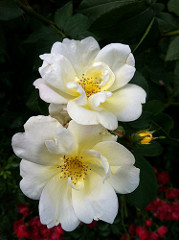

In [22]:
PIL.Image.open(str(roses[0]))

In [23]:
tulips = list(data_dir.glob('tulips/*'))

tulips[0:5]

[WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

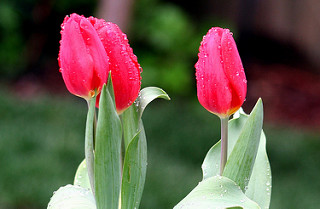

In [24]:
PIL.Image.open(str(tulips[0]))

## Read flowers images from disk into numpy array using opencv

In [25]:
flower_image_dict = {'roses' : list(data_dir.glob('roses/*')),
                     'daisy' : list(data_dir.glob('daisy/*')),
                     'dandelion' : list(data_dir.glob('dandelion/*')),
                     'sunflowers' : list(data_dir.glob('sunflowers/*')),
                     'tulips' : list(data_dir.glob('tulips/*'))
                    }

In [26]:
flower_label_dict = {'roses' : 0,
                     'daisy' : 1,
                     'dandelion' : 2,
                     'sunflowers' : 3,
                     'tulips' : 4
                    }

In [27]:
flower_image_dict['roses'][0:5]

[WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('D:/Data Science/Deep Learning/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [28]:
str(flower_image_dict['roses'][0])

'D:\\Data Science\\Deep Learning\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [29]:
img = cv2.imread(str(flower_image_dict['roses'][0]))

img.shape

(240, 179, 3)

In [30]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [31]:
X = []
y = []
for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        scaled_img = cv2.resize(img,(180, 180))
        X.append(scaled_img)
        y.append(flower_label_dict[flower_name])

In [32]:
X = np.array(X)
y = np.array(y)

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

## Preprocessing the data

In [34]:
X_train_scaled = X_train/ 255
X_test_scaled = X_test/ 255

## Build Convolutional Neural Network and Train

In [39]:
num_classes = 5

model = Sequential([
    layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    
    #Dense layers
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])


model.fit(X_train_scaled, y_train, epochs = 20)

Epoch 1/20
86/86 [==============================] - 41s 444ms/step - loss: 1.4523 - accuracy: 0.3776
Epoch 2/20
86/86 [==============================] - 38s 442ms/step - loss: 1.0254 - accuracy: 0.5988
Epoch 3/20
86/86 [==============================] - 38s 444ms/step - loss: 0.8282 - accuracy: 0.6785
Epoch 4/20
86/86 [==============================] - 38s 445ms/step - loss: 0.6311 - accuracy: 0.7618
Epoch 5/20
86/86 [==============================] - 38s 443ms/step - loss: 0.4563 - accuracy: 0.8366
Epoch 6/20
86/86 [==============================] - 38s 446ms/step - loss: 0.2747 - accuracy: 0.9100
Epoch 7/20
86/86 [==============================] - 38s 443ms/step - loss: 0.1423 - accuracy: 0.9607
Epoch 8/20
86/86 [==============================] - 38s 445ms/step - loss: 0.1032 - accuracy: 0.9674
Epoch 9/20
86/86 [==============================] - 38s 446ms/step - loss: 0.0394 - accuracy: 0.9913
Epoch 10/20
86/86 [==============================] - 38s 448ms/step - loss: 0.0185 - accura

In [41]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 4s 129ms/step - loss: 2.5211 - accuracy: 0.6394


[2.521057367324829, 0.6394335627555847]

In [42]:
# the model is overfitted. The learning rate is high but the test results are poor.

In [48]:
predictions = model.predict(X_test_scaled)

In [49]:
precictions

array([[  8.579388 ,  25.401707 ,  -0.8163886,  -7.9038353,  -3.3609705],
       [ 13.602686 ,  -2.3611143,  -9.1988125,  -1.1798548,  10.3561325],
       [ -3.3039286,   7.096423 ,  13.068651 ,  -9.564274 ,  -8.00038  ],
       ...,
       [  6.4521546,  -2.3421779,  -4.381959 ,  13.338023 ,   0.6152875],
       [  5.5244   ,   5.984584 ,  -2.5590825,  -0.1499192,  -4.238225 ],
       [ -0.3272897, -18.591274 ,   8.810506 ,  11.284192 ,   7.989701 ]],
      dtype=float32)

In [50]:
scores = tf.nn.softmax(predictions[0])

np.argmax(scores)

1

In [51]:
y_test[0]

1

In [52]:
# improve accuracy using data Augmentation

In [69]:
img_height = 180
img_width = 180

data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape = (img_height,
                                                                img_width, 
                                                                3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

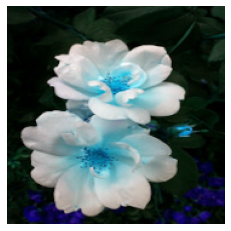

In [60]:
plt.axis('off')
plt.imshow(X[0])

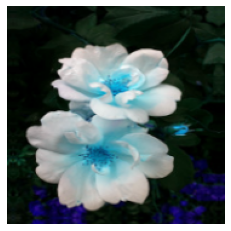

In [65]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [72]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    
    #Dense layers
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])


model.fit(X_train_scaled, y_train, epochs = 20)

Epoch 1/20
86/86 [==============================] - 50s 535ms/step - loss: 1.4427 - accuracy: 0.3592
Epoch 2/20
86/86 [==============================] - 45s 528ms/step - loss: 1.0367 - accuracy: 0.5896
Epoch 3/20
86/86 [==============================] - 46s 533ms/step - loss: 0.9488 - accuracy: 0.6272
Epoch 4/20
86/86 [==============================] - 46s 531ms/step - loss: 0.8707 - accuracy: 0.6676
Epoch 5/20
86/86 [==============================] - 46s 531ms/step - loss: 0.7805 - accuracy: 0.6927
Epoch 6/20
86/86 [==============================] - 47s 548ms/step - loss: 0.7944 - accuracy: 0.7131
Epoch 7/20
86/86 [==============================] - 46s 537ms/step - loss: 0.7189 - accuracy: 0.7217
Epoch 8/20
86/86 [==============================] - 4999s 59s/step - loss: 0.6701 - accuracy: 0.7285
Epoch 9/20
86/86 [==============================] - 46s 532ms/step - loss: 0.6498 - accuracy: 0.7513
Epoch 10/20
86/86 [==============================] - 45s 528ms/step - loss: 0.5899 - accura

In [74]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 4s 127ms/step - loss: 0.8535 - accuracy: 0.7244


[0.853547990322113, 0.7244008779525757]